# HomeWork07
<font size=1>
    Nikolaos Vasilas & Elias Kyritsis, 2024. All rights reserved.
</font>

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Exercise 1:** Find cluster of stars.

**Scientific context**: Stars are born within clouds of dust ("_star-forming regions_") and scattered throughout the galaxy. A star-forming region is a region of the celestial sphere within which predominately very young stellar objects (YSOs) are located. For that reason, star-forming regions are of particular importance in modern astronomy, since many conclusions about birth and evolution of young stars can be inferred by study them. Moreover, the way that stars are clustered (_distributed_) in those regions can provide important information about the star-forming processes that take place. They therefore hold a strong discriminatory power concerning the theoretical models of star formation. For this reason, it is extremely important to have a model that can easily identify groups of stars (_clusters_) on the sky using only their coordinates.
<br><br>
    
**Objective:** Create a clustering model that could be implemented in future studies to identify clusters of stars in star-forming regions.
<br><br>
    
**Dataset:** We deal with a dataset consisting of Local Group stars coordinates (X,Y) on the sky. Each data point represents the position of a bright star on the night sky. The name of the dataset is `HW07_data.csv`.
<br><br>
    
**Tasks:**

- **Ex. 1.1:**
    - Load the data and plot a scatter plot. Guess how many `n_clusters` are the optimal if run a ```KMEAN``` clustering. 
    - Use `KMeans()` as a clustering method to find the potential clusters of stars in this dataset. You may play around with the `n_clusters` parameter to find a reasonable amount of clusters.
    - Using this approximate search, plot the data along with the computed centroids, using a different color for the different predicted "classes" (_cluster labels_) in order to display how the clustering algorithm has separated the datapoints.
    - _Elbow method_ $-$ Make a plot of the **inertia** as a function of the `n_clusters` parameter to infer the real value of the number of clusters in the dataset.
    - Using the best hyperparameter found in this way, plot/print the coordinates of the centroids.
<br><br>

- **Ex. 1.2:**
Read carefully the notes found at [this link](https://www.geeksforgeeks.org/clustering-metrics/), and:<br>
    - Write a function that calculates the Davies Bouldin Index (**Don't use the already existing one from sklearn**). For simplicity, you may use the `KMeans()` with `n_clusters`=3;
    - then, repeat for `n_clusters`=5.
<br><br>

- **Ex. 1.3:** Describe in your own way which, among the results obtained in **Ex. 1.2**, you consider as the best. Could you think of any reasonable statistical way to assess it?
<br><br>
    
- **Ex. 1.4: [Bonus]**: Do the same as in **Ex. 1.2** but now calculate the Calinski-Harabasz Index (**Again don't use the already existing one from sklearn**)
</div>

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Exercise 2:** Compare algorithms.

**Tasks:**

- **Ex. 2.1:** Instead of using `KMeans()`, adopt the `DBSCAN()` clustering algorithm to find the clusters of stars in the dataset.<br><br>

    - Make a plot of the data along with the predicted labels (_use different colors to visualize different labels_).
    - Play around with the parameters `eps` and `min_samples` until you are satisfied with the result.
    - Print the coordinates of the centroids.<br><br>

- **Ex. 2.2:** Comment on the results of each method (i.e., `KMeans()` _vs._ `DBSCAN()`) and argue in favor of one of them, trying to convince a hypothetical supervisor.
</div>

# Ex. 1.1

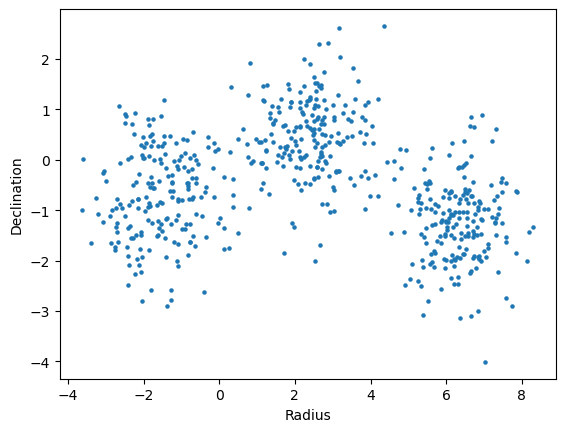

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd. read_csv('C:/Users/micha/Desktop/python_datafiles/HW07_data.csv')
x=data['RA']
y=data['Dec']
plt.scatter(x,y,s=5)
plt.xlabel('Radius')
plt.ylabel('Declination')
plt.show()

**Initial Guess: the optimal n_clusters is 5**

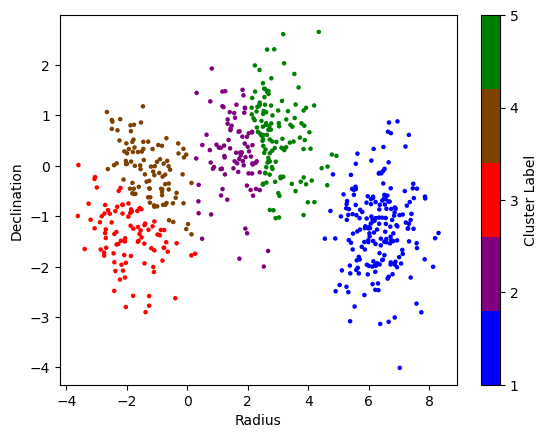

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import matplotlib
import warnings
warnings.filterwarnings("ignore")

guess_n_cluster=5

kmeans_in_model = KMeans(n_clusters=guess_n_cluster, random_state=42)
kmeans_in_model.fit(data)
labels1=kmeans_in_model.labels_


# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map1 = matplotlib.cm.gray.from_list('whatever', ('blue', 'red','green'), N=guess_n_cluster)
scat1 = plt.scatter( x, y, c=labels1, edgecolors='face', cmap=new_map1, s=5)
cb1 = plt.colorbar(scat1, ticks=range(0,guess_n_cluster+1,1))   # number of clusters
cb1.set_ticklabels(range(1,guess_n_cluster+2,1))
cb1.set_label('Cluster Label')
plt.xlabel('Radius')
plt.ylabel('Declination')
plt.show()

**Elbow Method**

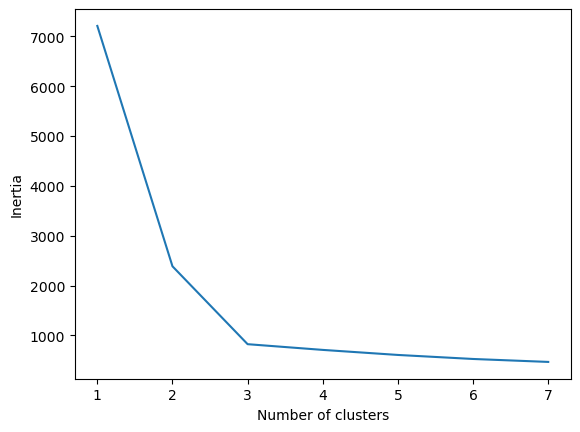

In [10]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

inert = []
xclusters = range(1,8)
for i in xclusters:
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit(data)
    inert.append(kmeans_model.inertia_)
plt.plot( xclusters, inert)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**So number of clusters is 3**

Cluster centers:
for cluster 1, (Radius,Declination) = [-1.53604976 -0.71939755]
for cluster 2, (Radius,Declination) = [ 6.3108396  -1.22437637]
for cluster 3, (Radius,Declination) = [2.40220016 0.46933107]


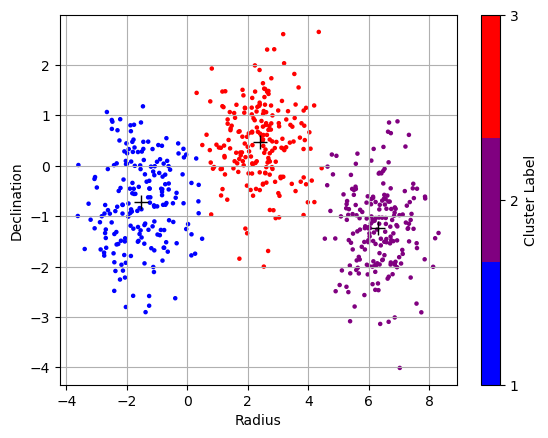

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import matplotlib

n_clusters=3

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(data)
labels=kmeans_model.labels_

# coordinates of the clusters for plotting
print("Cluster centers:")
centers=kmeans_model.cluster_centers_

for j in range(3):
    print(f'for cluster {j+1}, (Radius,Declination) = {centers[j]}')
    
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=10)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=n_clusters)
scat2 = plt.scatter( x, y, c=labels, cmap=new_map, s=5)
cb = plt.colorbar(scat2, ticks=range(0,n_clusters+1,1))   # number of clusters
cb.set_ticklabels(range(1,n_clusters+2,1))
cb.set_label('Cluster Label')
plt.xlabel('Radius')
plt.ylabel('Declination')
plt.grid()
plt.show()

# Ex. 2.1

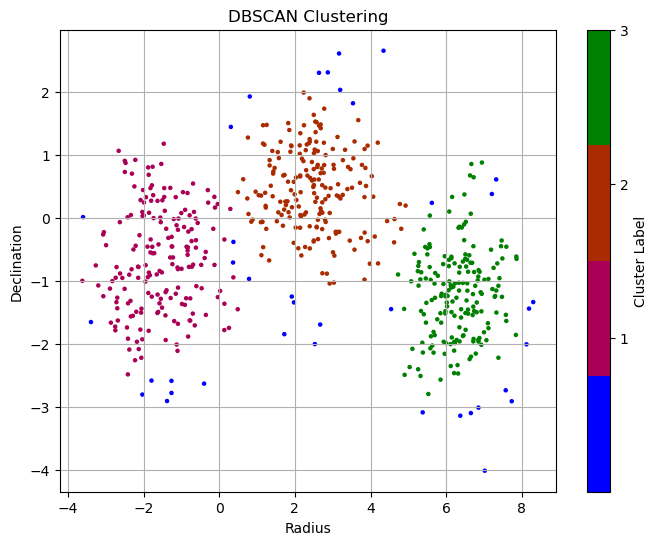

Centroids:
for cluster 1, (Radius,Declination) = [-1.54120407 -0.65605345]
for cluster 2, (Radius,Declination) = [2.46817046 0.4490436 ]
for cluster 3, (Radius,Declination) = [ 6.30641311 -1.2031626 ]


In [78]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
 
dbscan_model = DBSCAN(eps=0.45, min_samples=5)
fit = dbscan_model.fit(data)
labels2=dbscan_model.labels_
unique_labels=set(labels2)
n_clust=len(unique_labels)

plt.figure(figsize=(8, 6))
new_map3 = matplotlib.cm.gray.from_list('whatever', ('blue', 'red','green'), N=n_clust)
scat3=plt.scatter(x, y, c=labels2, cmap=new_map3, s=5)
cb3 = plt.colorbar(scat3, ticks=range(0,n_clust+1,1))  # number of clusters
cb3.set_ticklabels(range(1,n_clust+2,1))
cb3.set_label('Cluster Label')
plt.title('DBSCAN Clustering')
plt.xlabel('Radius')
plt.ylabel('Declination')
plt.grid()
plt.show()

#centroids
labels_wt_outliers=unique_labels-{-1}
centroids = []
data_arr=np.array(data)

for i in labels_wt_outliers:
    cluster = data_arr[labels2 == i]
    centroid = cluster.mean(axis=0)
    centroids.append(centroid)

print("Centroids:")
for j in range(3):
    print(f'for cluster {j+1}, (Radius,Declination) = {centroids[j]}')

# Ex. 2.2

#